In [1]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/sales_data.csv')

In [ ]:
df.head(2)

,Order Date,Order ID,Product_ean,catégorie,Purchase Address,Quantity Ordered,Price Each,Cost price,turnover,margin,...,Product_Google Phone,Product_LG Dryer,Product_LG Washing Machine,Product_Lightning Charging Cable,Product_Macbook Pro Laptop,Product_ThinkPad Laptop,Product_USB-C Charging Cable,Product_Vareebadd Phone,Product_Wired Headphones,Product_iPhone
0,2019-01-22 21:25:00,141234,5.638009e+12,2,"944 Walnut St, Boston, MA 02215",1,700.00,231.000,700.00,469.000,...,False,False,False,False,False,False,False,False,False,True
1,2019-01-28 14:15:00,141235,5.563320e+12,0,"185 Maple St, Portland, OR 97035",1,14.95,7.475,14.95,7.475,...,False,False,False,True,False,False,False,False,False,False


In [ ]:
df.shape

(67612, 11)

In [ ]:
df.columns

Index(['Order Date', 'Order ID', 'Product_ean', 'catégorie',
       'Purchase Address', 'Quantity Ordered', 'Price Each', 'Cost price',
       'turnover', 'margin', 'Product_20in Monitor',
       'Product_27in 4K Gaming Monitor', 'Product_27in FHD Monitor',
       'Product_34in Ultrawide Monitor', 'Product_AA Batteries (4-pack)',
       'Product_AAA Batteries (4-pack)', 'Product_Apple Airpods Headphones',
       'Product_Bose SoundSport Headphones', 'Product_Flatscreen TV',
       'Product_Google Phone', 'Product_LG Dryer',
       'Product_LG Washing Machine', 'Product_Lightning Charging Cable',
       'Product_Macbook Pro Laptop', 'Product_ThinkPad Laptop',
       'Product_USB-C Charging Cable', 'Product_Vareebadd Phone',
       'Product_Wired Headphones', 'Product_iPhone'],
      dtype='object')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.get_dummies(df, columns=['Product'])

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['catégorie'] = le.fit_transform(df['catégorie'])

In [ ]:
df.head(2)

,Order Date,Order ID,Product_ean,catégorie,Purchase Address,Quantity Ordered,Price Each,Cost price,turnover,margin,...,Product_Google Phone,Product_LG Dryer,Product_LG Washing Machine,Product_Lightning Charging Cable,Product_Macbook Pro Laptop,Product_ThinkPad Laptop,Product_USB-C Charging Cable,Product_Vareebadd Phone,Product_Wired Headphones,Product_iPhone
0,2019-01-22 21:25:00,141234,5.638009e+12,2,"944 Walnut St, Boston, MA 02215",1,700.00,231.000,700.00,469.000,...,False,False,False,False,False,False,False,False,False,True
1,2019-01-28 14:15:00,141235,5.563320e+12,0,"185 Maple St, Portland, OR 97035",1,14.95,7.475,14.95,7.475,...,False,False,False,True,False,False,False,False,False,False


In [ ]:
df.shape

(67612, 29)

In [ ]:
df = df.drop(df.columns[[0,4,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28]], axis=1)

In [ ]:
df.head()

,Order ID,Product_ean,catégorie,Quantity Ordered,Price Each,Cost price,turnover,margin
0,141234,5.638009e+12,2,1,700.00,231.0000,700.00,469.0000
1,141235,5.563320e+12,0,1,14.95,7.4750,14.95,7.4750
2,141236,2.113973e+12,2,2,11.99,5.9950,23.98,11.9900
3,141237,3.069157e+12,1,1,149.99,97.4935,149.99,52.4965
4,141238,9.692681e+12,3,1,11.99,5.9950,11.99,5.9950


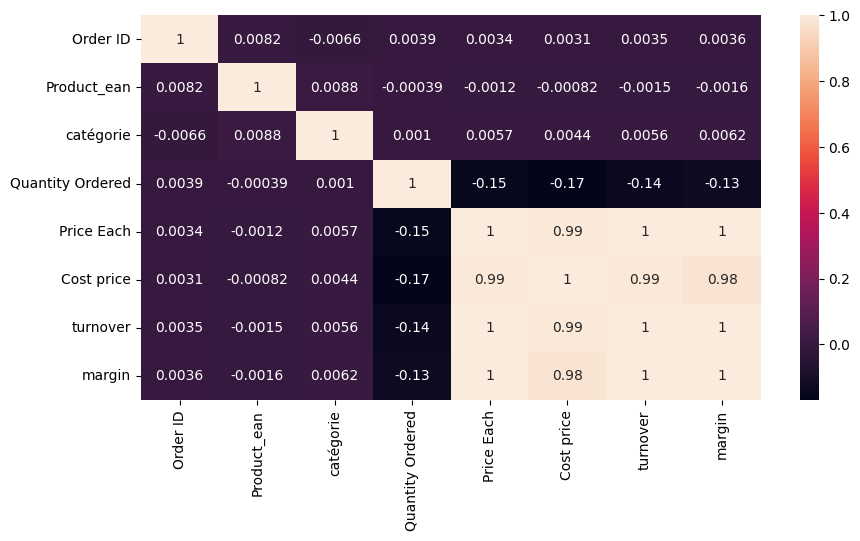

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(data=df.corr(),annot=True)
plt.show()

In [ ]:
X = df.iloc[:,0:7]
y = df["turnover"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

In [ ]:
from sklearn.linear_model import LinearRegression
L=LinearRegression()
L.fit(X_train,y_train)

LinearRegression()

In [ ]:
print(L.coef_)
print(L.intercept_)

[ 2.45196524e-06 -2.27314845e-14  9.78526425e-06 -9.19088631e-05
  4.74873966e-01  1.54628826e-01  4.75820799e-01]
-1.3729599771680796


In [ ]:
y_pred=L.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
print("R2 score",r2_score(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score 0.9996801818032794
RMSE 5.950102033493057


# Ridge Regeression

In [ ]:
from sklearn.linear_model import Ridge
R=Ridge(alpha=600)
R.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.78374e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge(alpha=600)

In [ ]:
print(R.coef_)
print(R.intercept_)

[ 1.24246976e-10 -1.76399138e-18 -1.75725404e-06  2.67572209e-04
  3.87112602e-05  7.66330553e-07  9.99961121e-01]
-0.00028753141512538605


In [ ]:
y_pred1=R.predict(X_test)
print("R2 score",r2_score(y_test,y_pred1))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred1)))

R2 score 0.999999999998679
RMSE 0.0003824098783708228


In [ ]:
dc = pd.DataFrame({"col_names":X.columns,"Lr":L.coef_,"Ridge":R.coef_})

In [ ]:
dc

,col_names,Lr,Ridge
0,Order ID,2.451965e-06,1.242470e-10
1,Product_ean,-2.273148e-14,-1.763991e-18
2,catégorie,9.785264e-06,-1.757254e-06
3,Quantity Ordered,-9.190886e-05,2.675722e-04
4,Price Each,4.748740e-01,3.871126e-05
5,Cost price,1.546288e-01,7.663306e-07
6,turnover,4.758208e-01,9.999611e-01


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/student-mat.csv')

In [ ]:
df.head()

,school,sex,age,address,famsize,Parrent_status,Mother_edu,Father_edu,Mother_job,Father_job,...,Family_quality_reln,freetime_after_school,goout_with_friends,workday_alcohol_consum,weekend_alcohol_consum,health_status,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
df.shape

(395, 33)

In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
df[categorical_cols] = encoder.fit_transform(df[categorical_cols])

In [ ]:
df.head(2)

,school,sex,age,address,famsize,Parrent_status,Mother_edu,Father_edu,Mother_job,Father_job,...,Family_quality_reln,freetime_after_school,goout_with_friends,workday_alcohol_consum,weekend_alcohol_consum,health_status,absences,G1,G2,G3
0,0.0,0.0,18,1.0,0.0,0.0,4,4,0.0,4.0,...,4,3,4,1,1,3,6,5,6,6
1,0.0,0.0,17,1.0,0.0,1.0,1,1,0.0,2.0,...,5,3,3,1,1,3,4,5,5,6


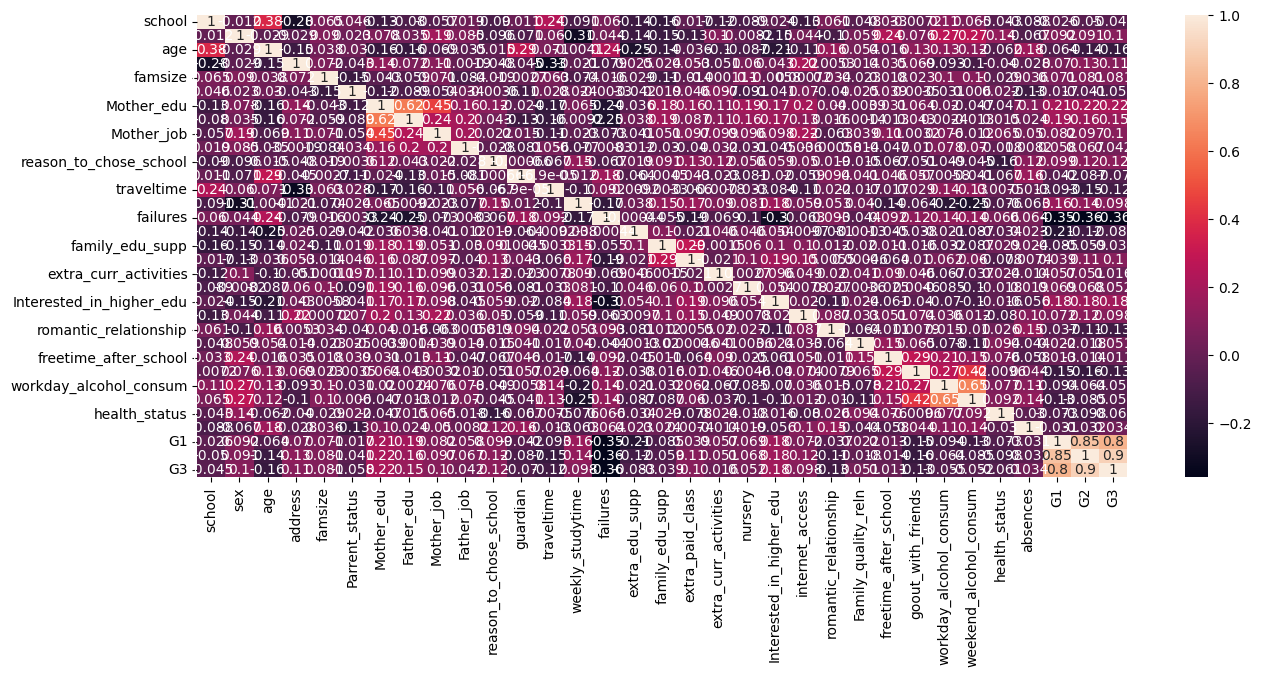

In [ ]:
plt.figure(figsize=(15, 6))  # Adjust figure size
sns.heatmap(df.corr(), annot=True)
plt.show()

In [ ]:
X = df.iloc[:,:32]
y = df["G3"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
L=LinearRegression()
L.fit(X_train,y_train)

LinearRegression()

In [ ]:
print(L.coef_)
print(L.intercept_)

[ 0.1022317   0.29386915 -0.15687936 -0.05003416 -0.00248649 -0.05189913
  0.11505068 -0.16183809  0.02983142 -0.14560364 -0.03011907  0.06836454
  0.14003259 -0.0150847  -0.38597131  0.75096133  0.17604276  0.07429162
 -0.58512818 -0.26509158  0.13956999 -0.23463483 -0.40791494  0.28920995
  0.00626369  0.17181382 -0.174827    0.07948833  0.05450773  0.0495036
  0.20612317  0.95456906]
-0.8803438796908942


In [ ]:
y_pred=L.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error

print("R2 score",r2_score(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score 0.7545777855043501
RMSE 2.2432998258963823


In [ ]:
from sklearn.linear_model import Ridge
R=Ridge(alpha=650)
R.fit(X_train,y_train)

Ridge(alpha=650)

In [ ]:
print(R.coef_)
print(R.intercept_)

[-4.07290046e-03  2.57270424e-02 -1.15522271e-01  6.63394083e-03
  4.50742607e-03 -1.24848396e-02  3.48088757e-02 -2.37655186e-02
  2.12781070e-02 -4.17287300e-02 -3.90868865e-04 -4.16913371e-03
  9.74297807e-03 -1.58774239e-03 -1.04503787e-01  4.04621465e-02
  2.10561586e-02  3.12738781e-02 -4.87661489e-02 -7.55682381e-03
  1.50113219e-02 -3.68202286e-03 -7.07756914e-02  9.43855107e-02
  1.11720263e-02  3.04521108e-02 -1.87569833e-02  2.14548931e-02
  1.61078150e-02  4.05063516e-02  3.18177758e-01  7.60706850e-01]
-0.09839282178742081


In [ ]:
y_pred1=R.predict(X_test)
print("R2 score",r2_score(y_test,y_pred1))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred1)))

R2 score 0.7910853330357828
RMSE 2.0697355195999183


In [ ]:
R.predict([[0, 1, 16, 0, 1, 0, 3, 2, 1, 4, 2, 0, 2, 3, 0, 1, 0, 1, 1, 1, 1, 1, 0, 4, 3, 2, 1, 3, 5, 4, 12, 14]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


array([13.26359095])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   school                    395 non-null    float64
 1   sex                       395 non-null    float64
 2   age                       395 non-null    int64  
 3   address                   395 non-null    float64
 4   famsize                   395 non-null    float64
 5   Parrent_status            395 non-null    float64
 6   Mother_edu                395 non-null    int64  
 7   Father_edu                395 non-null    int64  
 8   Mother_job                395 non-null    float64
 9   Father_job                395 non-null    float64
 10  reason_to_chose_school    395 non-null    float64
 11  guardian                  395 non-null    float64
 12  traveltime                395 non-null    int64  
 13  weekly_studytime          395 non-null    int64  
 14  failures  

In [ ]:
df.iloc[73]

,73
school,0.0
sex,1.0
age,16.0
address,1.0
famsize,0.0
Parrent_status,1.0
Mother_edu,3.0
Father_edu,1.0
Mother_job,2.0
Father_job,2.0


In [ ]:
df.corr()

,school,sex,age,address,famsize,Parrent_status,Mother_edu,Father_edu,Mother_job,Father_job,...,Family_quality_reln,freetime_after_school,goout_with_friends,workday_alcohol_consum,weekend_alcohol_consum,health_status,absences,G1,G2,G3
school,1.000000,-0.012286,0.377610,-0.279797,0.064866,0.045923,-0.133333,-0.079807,-0.056670,0.018974,...,-0.047926,0.032988,-0.007152,0.114209,0.065087,-0.042651,-0.088480,-0.025731,-0.050086,-0.045017
sex,-0.012286,1.000000,-0.028606,-0.028504,0.089862,0.023443,0.078228,0.034878,0.191421,0.084957,...,0.058971,0.238744,0.075897,0.268171,0.274194,0.143588,-0.066962,0.091839,0.091099,0.103456
age,0.377610,-0.028606,1.000000,-0.146722,0.037847,0.029598,-0.163658,-0.163438,-0.069104,-0.035191,...,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
address,-0.279797,-0.028504,-0.146722,1.000000,0.072472,-0.042572,0.138804,0.072178,0.108818,-0.001911,...,0.014258,0.034878,0.068835,-0.093494,-0.101126,-0.040355,-0.027874,0.069704,0.126037,0.105756
famsize,0.064866,0.089862,0.037847,0.072472,1.000000,-0.149612,-0.043068,-0.058879,0.071386,-0.084448,...,-0.022776,0.017695,0.023064,0.101521,0.103425,-0.028992,0.035783,0.071445,0.081223,0.081407
Parrent_status,0.045923,0.023443,0.029598,-0.042572,-0.149612,1.000000,-0.123565,-0.088730,-0.054476,0.033892,...,0.025179,0.038717,0.003459,-0.030590,0.006045,0.022307,-0.134937,-0.016868,-0.041382,-0.058009
Mother_edu,-0.133333,0.078228,-0.163658,0.138804,-0.043068,-0.123565,1.000000,0.623455,0.454805,0.157920,...,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Father_edu,-0.079807,0.034878,-0.163438,0.072178,-0.058879,-0.088730,0.623455,1.000000,0.243327,0.200169,...,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
Mother_job,-0.056670,0.191421,-0.069104,0.108818,0.071386,-0.054476,0.454805,0.243327,1.000000,0.196758,...,0.038584,0.114321,0.003169,0.076076,-0.012051,0.065220,0.050254,0.081674,0.097390,0.102082
Father_job,0.018974,0.084957,-0.035191,-0.001911,-0.084448,0.033892,0.157920,0.200169,0.196758,1.000000,...,0.013709,-0.047475,0.010340,0.077897,0.070024,-0.018058,0.008196,0.057661,0.067006,0.042286


# Gradient Descent In Ridge Regression

In [ ]:
from sklearn.linear_model import SGDRegressor
reg = SGDRegressor(penalty='l2',max_iter=500,eta0=0.1,learning_rate='constant',alpha=0.001)
reg.fit(X_train,y_train)

y_pred = reg.predict(X_test)
print("R2 score",r2_score(y_test,y_pred))
print(reg.coef_)
print(reg.intercept_)

R2 score -5.86035138569242e+25
[-7.67124772e+11  1.07002194e+12 -3.50601980e+12  5.66950169e+11
 -1.30932199e+12 -4.70711822e+11  4.82947601e+11  5.56296963e+11
  1.97616379e+12  1.62449992e+12  8.87977403e+11  2.18170380e+12
  8.92312173e+11 -1.22403825e+12  7.35711222e+11  1.21647974e+11
 -5.21464717e+11  3.44622784e+10  4.81974969e+12 -1.02181644e+12
  1.77596029e+11  1.18944213e+12 -8.16606991e+11  2.89925655e+12
 -3.80138173e+12 -1.94216874e+11 -2.72060825e+12  2.53764793e+12
 -1.82501965e+11  5.73191792e+12  3.86726954e+10  7.30874513e+11]
[-2.16667122e+10]


In [ ]:
from sklearn.linear_model import Ridge

reg = Ridge(alpha=0.002, max_iter=500,solver='sparse_cg')

In [ ]:
reg.fit(X_train,y_train)

y_pred = reg.predict(X_test)
print("R2 score",r2_score(y_test,y_pred))
print(reg.coef_)
print(reg.intercept_)

R2 score 0.7545894238483556
[ 0.10341212  0.29141258 -0.15721811 -0.04917364 -0.0028982  -0.05540301
  0.11512011 -0.16146787  0.02956152 -0.14615204 -0.03080474  0.06896409
  0.13842728 -0.0155222  -0.38694069  0.75329036  0.17769007  0.07917724
 -0.58401972 -0.26649983  0.11749184 -0.23425864 -0.40769887  0.28982366
  0.00616375  0.17143405 -0.17413246  0.07956497  0.05445664  0.04943287
  0.20672191  0.95424967]
-0.8537618775452636


In [ ]:
from sklearn.linear_model import Ridge

reg1 = Ridge(alpha=0.002, max_iter=500,solver='sag')

In [ ]:
reg1.fit(X_train,y_train)

y_pred = reg1.predict(X_test)
print("R2 score",r2_score(y_test,y_pred))
print(reg1.coef_)
print(reg1.intercept_)

R2 score 0.7551547590511455
[ 0.09784909  0.28105941 -0.15929667 -0.05146489 -0.00381827 -0.05802083
  0.11282266 -0.16040781  0.03060738 -0.14644783 -0.02996897  0.06945735
  0.14047916 -0.01557298 -0.38842535  0.71453597  0.17853523  0.07130328
 -0.57846164 -0.2573718   0.1108438  -0.22834928 -0.41268038  0.2905479
  0.00653752  0.17087419 -0.17147434  0.07919987  0.05451541  0.04941297
  0.20489307  0.95527296]
-0.8059226692051098


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
from sklearn.linear_model import Ridge

reg2 = Ridge(alpha=0.002, max_iter=500,solver='saga')

In [ ]:
reg2.fit(X_train,y_train)

y_pred = reg2.predict(X_test)
print("R2 score",r2_score(y_test,y_pred))
print(reg2.coef_)
print(reg2.intercept_)

R2 score 0.7574194951138395
[ 0.07971317  0.23710094 -0.1659874  -0.05642474 -0.01216163 -0.06783796
  0.10529187 -0.15726723  0.03244613 -0.14883884 -0.03004261  0.07148291
  0.14224932 -0.02086669 -0.39178149  0.58699111  0.17913796  0.06275213
 -0.54992717 -0.21976242  0.08152092 -0.20284529 -0.41750438  0.29583041
  0.00741942  0.16709206 -0.15901067  0.0778098   0.05453899  0.04916517
  0.19963101  0.95811843]
-0.6483597185298464


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
